In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree,datasets,preprocessing
from scipy.io import arff
from matplotlib import pyplot as plt
import graphviz
import numpy as np

In [2]:
RawData=arff.loadarff("./Dataset/vertebral_column_data/column_3C_weka.arff")
#RawData = np.loadtxt("./Dataset/vertebral_column_data/column_3C.dat", delimiter=' ')
print(RawData[0])

[( 63.0278175 , 22.55258597,  39.60911701,  40.47523153,  98.67291675, -2.54399986e-01, b'Hernia')
 ( 39.05695098, 10.06099147,  25.01537822,  28.99595951, 114.4054254 ,  4.56425864e+00, b'Hernia')
 ( 68.83202098, 22.21848205,  50.09219357,  46.61353893, 105.9851355 , -3.53031731e+00, b'Hernia')
 ( 69.29700807, 24.65287791,  44.31123813,  44.64413017, 101.8684951 ,  1.12115234e+01, b'Hernia')
 ( 49.71285934,  9.65207488,  28.317406  ,  40.06078446, 108.1687249 ,  7.91850062e+00, b'Hernia')
 ( 40.25019968, 13.92190658,  25.1249496 ,  26.32829311, 130.3278713 ,  2.23065173e+00, b'Hernia')
 ( 53.43292815, 15.86433612,  37.16593387,  37.56859203, 120.5675233 ,  5.98855070e+00, b'Hernia')
 ( 45.36675362, 10.75561143,  29.03834896,  34.61114218, 117.2700675 , -1.06758708e+01, b'Hernia')
 ( 43.79019026, 13.5337531 ,  42.69081398,  30.25643716, 125.0028927 ,  1.32890182e+01, b'Hernia')
 ( 36.68635286,  5.01088412,  41.9487509 ,  31.67546874,  84.24141517,  6.64437117e-01, b'Hernia')
 ( 49.7066

In [3]:
Data = pd.DataFrame(RawData[0])
FeatureName=Data.columns
Data.iloc[:,6]=Data.iloc[:,6].str.decode('utf-8')
print(Data.iloc[0:2,:])
print("------------------------------------------")
print(FeatureName)

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   

   pelvic_radius  degree_spondylolisthesis   class  
0      98.672917                 -0.254400  Hernia  
1     114.405425                  4.564259  Hernia  
------------------------------------------
Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')


Check Outliers

[array([129.8340406, 118.1446548, 115.9232606], dtype=object), array([-6.554948347, 41.55733141, 41.28630543, 39.82272448, 42.39620445,
       48.06953097, 39.84466878, 48.90365265, 42.68919513, 49.4318636,
       40.30376567, 41.93368293, 46.55005318], dtype=object), array([125.7423855], dtype=object), array([121.4295656], dtype=object), array([84.24141517, 82.45603817, 81.0245406, 70.08257486, 78.99945411,
       88.43424213, 148.5255624, 151.8398566, 163.0710405, 157.848799,
       147.8946372], dtype=object), array([101.7190919, 145.3781432, 110.8607824, 148.7537109, 418.5430821,
       118.3533701, 104.8592474, 124.9844057, 117.3146829, 101.2187828],
      dtype=object)]
39


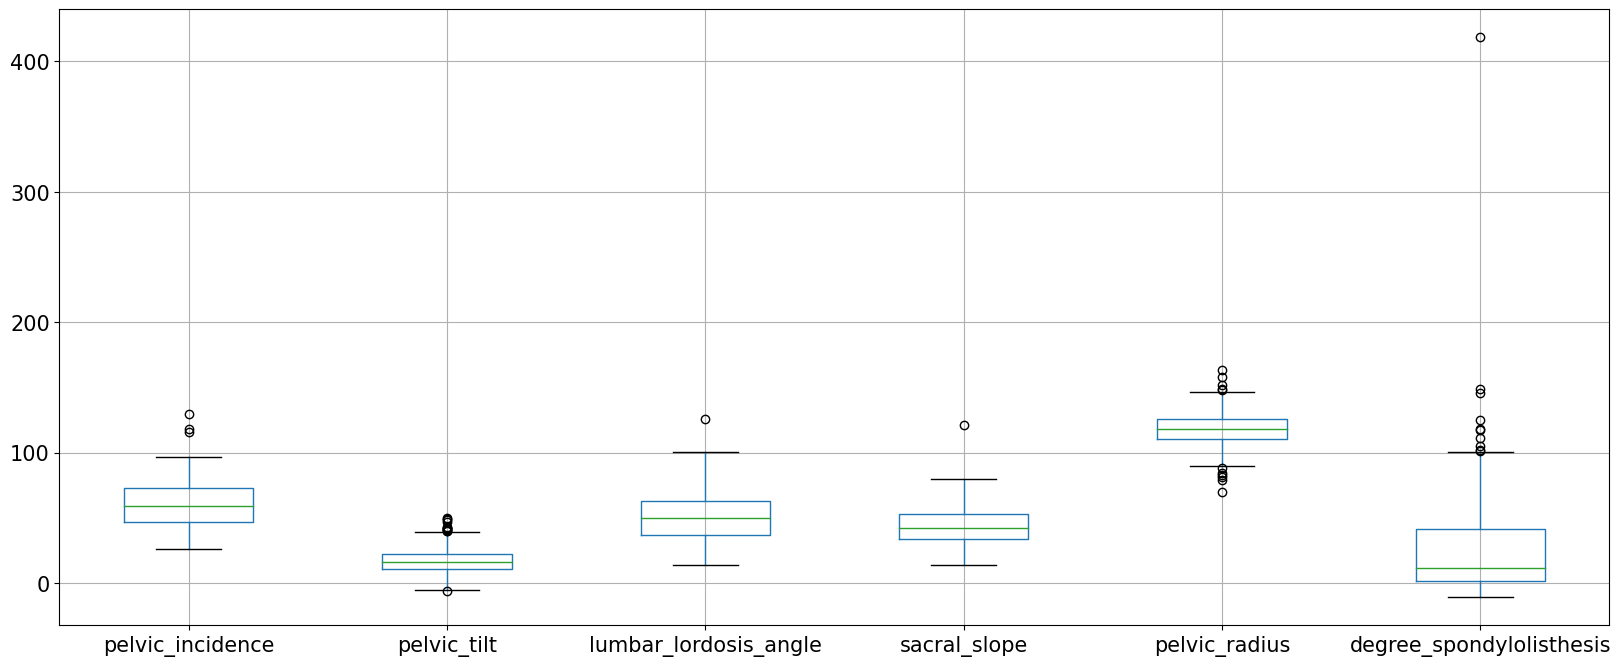

In [4]:

# import seaborn as sns
# for i in range(0,6):
#     plt.figure()  # forces a new figure
#     sns.boxplot(Data.iloc[:,i])
bp= Data.boxplot(fontsize=15,return_type='dict',figsize=(20,8))
outliers = [flier.get_ydata() for flier in bp["fliers"]]
total_elements = sum(len(l) for l in outliers)
print(outliers)
print(total_elements)

# Remove outliers

In [5]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    #print("high: ",fence_high)
    mask = (df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)
    return mask

mask =remove_outlier(Data,FeatureName[0])
for i in range (1,6):
    mask = mask & remove_outlier(Data,FeatureName[i])
    print(310-np.count_nonzero(remove_outlier(Data,FeatureName[i])))
FilterData= Data.loc[mask]
print(FilterData)
# for Name in FeatureName[0:6]:
#print([whiskers.get_ydata() for whiskers in bp["whiskers"]])
#print([box.get_ydata() for box in bp["boxes"]])
# stats = Data.describe()
# print(stats)
    

13
1
1
11
10
     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis   class  
0        98.672917             

# Normalization

In [6]:
for col in FilterData.columns[0:6]:
     FilterData[col]= (FilterData[col]-FilterData[col].min()) / (FilterData[col].max()-FilterData[col].min())
FilterData[FeatureName[0]].max()
print(FilterData)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0            0.523049     0.636787               0.295226      0.414328   
1            0.183082     0.356686               0.126987      0.238877   
2            0.605368     0.629295               0.416076      0.508147   
3            0.611962     0.683882               0.349432      0.478046   
4            0.334210     0.347516               0.165053      0.407994   
..                ...          ...                    ...           ...   
305          0.308550     0.436416               0.253619      0.319744   
306          0.394115     0.595728               0.175465      0.303365   
307          0.500624     0.639980               0.370864      0.387984   
308          0.270955     0.326014               0.317982      0.354481   
309          0.109116     0.244861               0.261011      0.235387   

     pelvic_radius  degree_spondylolisthesis   class  
0         0.166367                  0.097025

C:\Users\benxi\AppData\Local\Temp\ipykernel_20996\3541316390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FilterData[col]= (FilterData[col]-FilterData[col].min()) / (FilterData[col].max()-FilterData[col].min())


In [7]:
XData=np.array(FilterData.iloc[:,0:6])
YLabels=np.array(FilterData.iloc[:,6])
LabelEncoder= preprocessing.LabelEncoder()
YTarget=LabelEncoder.fit_transform(YLabels)
ClassNames=LabelEncoder.classes_
print(XData[0],YLabels[0])
print("ClassName: ", ClassNames)

[0.5230494  0.6367871  0.29522563 0.41432819 0.16636685 0.09702515] Hernia
ClassName:  ['Hernia' 'Normal' 'Spondylolisthesis']


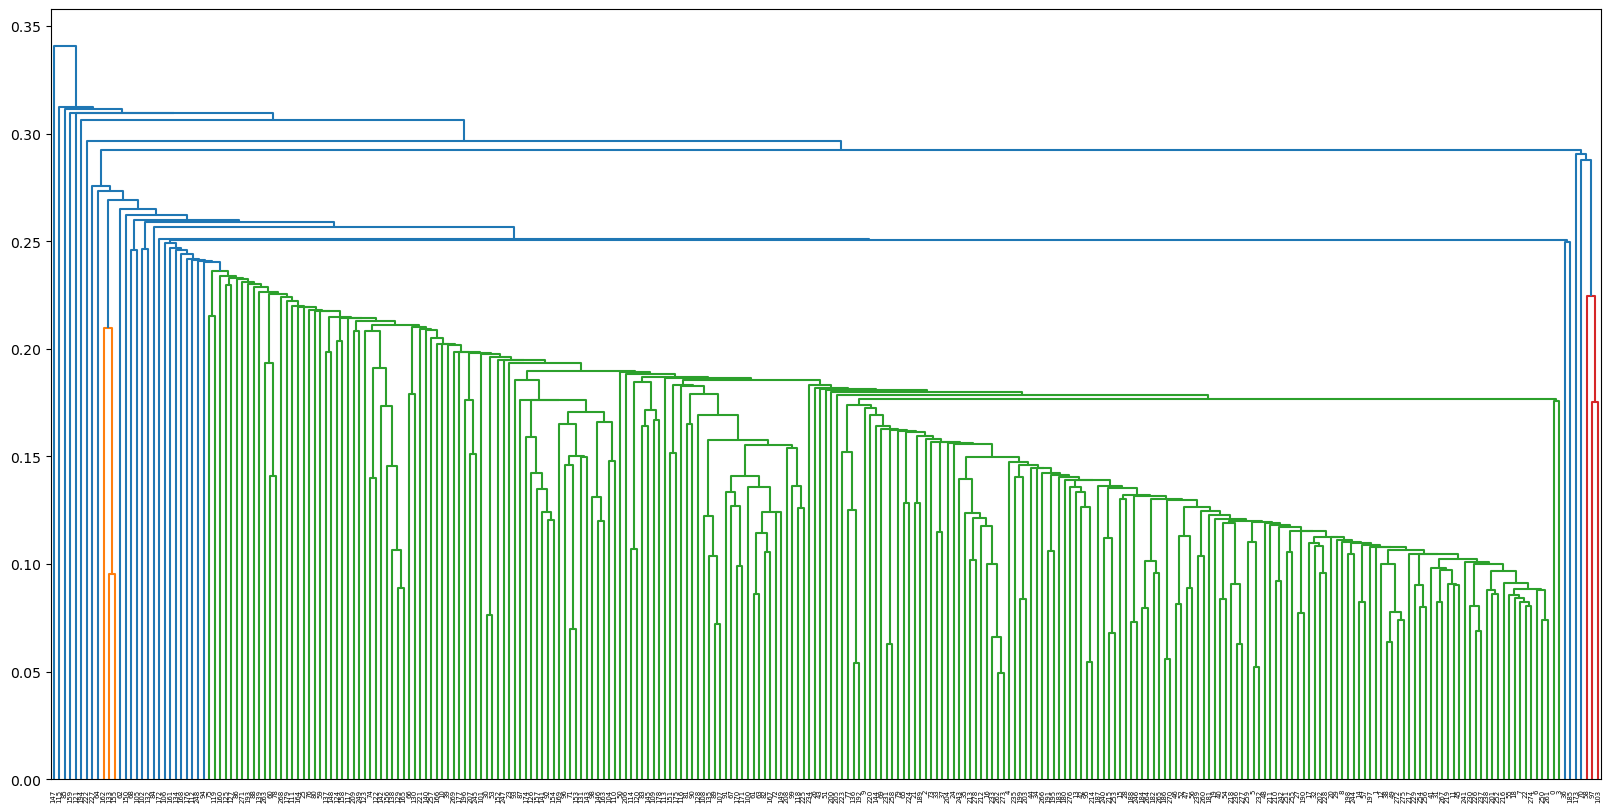

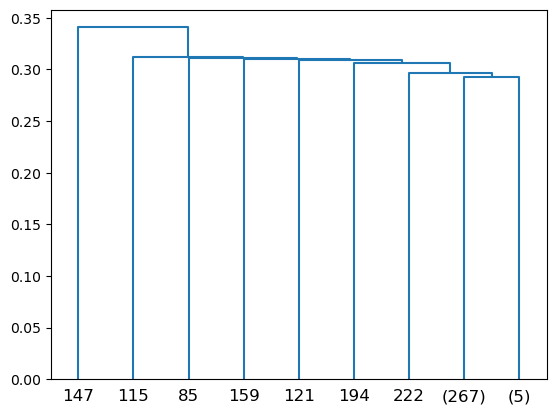

In [16]:
SingleCluster = linkage(XData,"single")
plt.figure(figsize=[20,10])
dendrogram(SingleCluster)
plt.show()

plt.figure()
dendrogram(SingleCluster,truncate_mode="lastp",p=9)
plt.show()

In [9]:
KSingleCluster = fcluster(SingleCluster,3,criterion="maxclust")
unique, counts = np.unique(KSingleCluster, return_counts=True)
print("Singe-hierarchical cluster ",dict(zip(unique, counts)))

Singe-hierarchical cluster  {1: 277, 2: 1, 3: 1}


## Subset

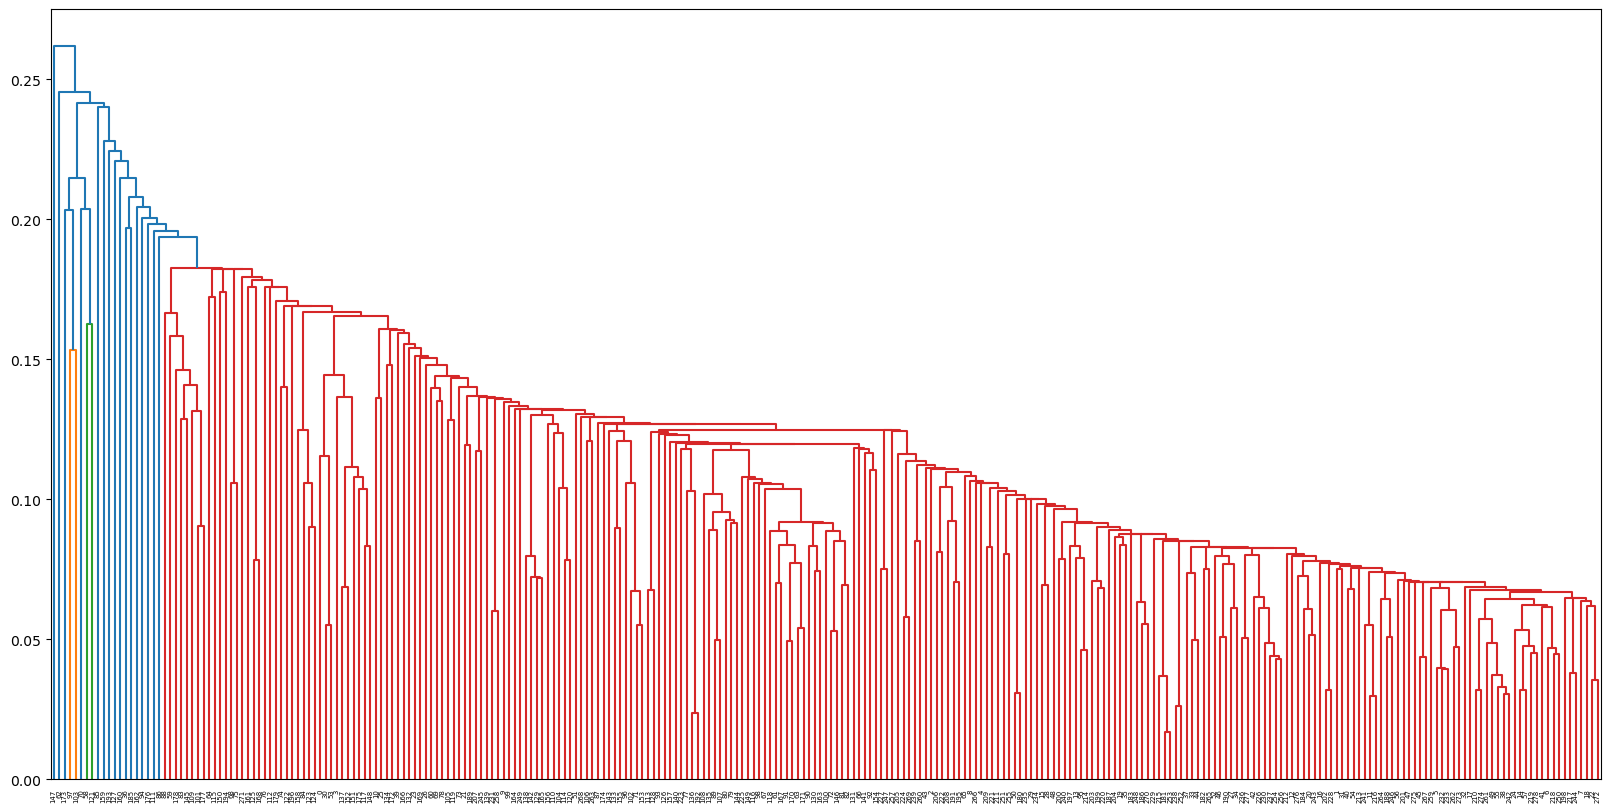

Singe-hierarchical cluster  {1: 277, 2: 1, 3: 1}


In [24]:
SingleCluster = linkage(XData[:,2:],"single")
plt.figure(figsize=[20,10])
dendrogram(SingleCluster)
plt.show()

KSingleCluster = fcluster(SingleCluster,3,criterion="maxclust")
unique, counts = np.unique(KSingleCluster, return_counts=True)
print("Singe-hierarchical cluster ",dict(zip(unique, counts)))

# Complete 

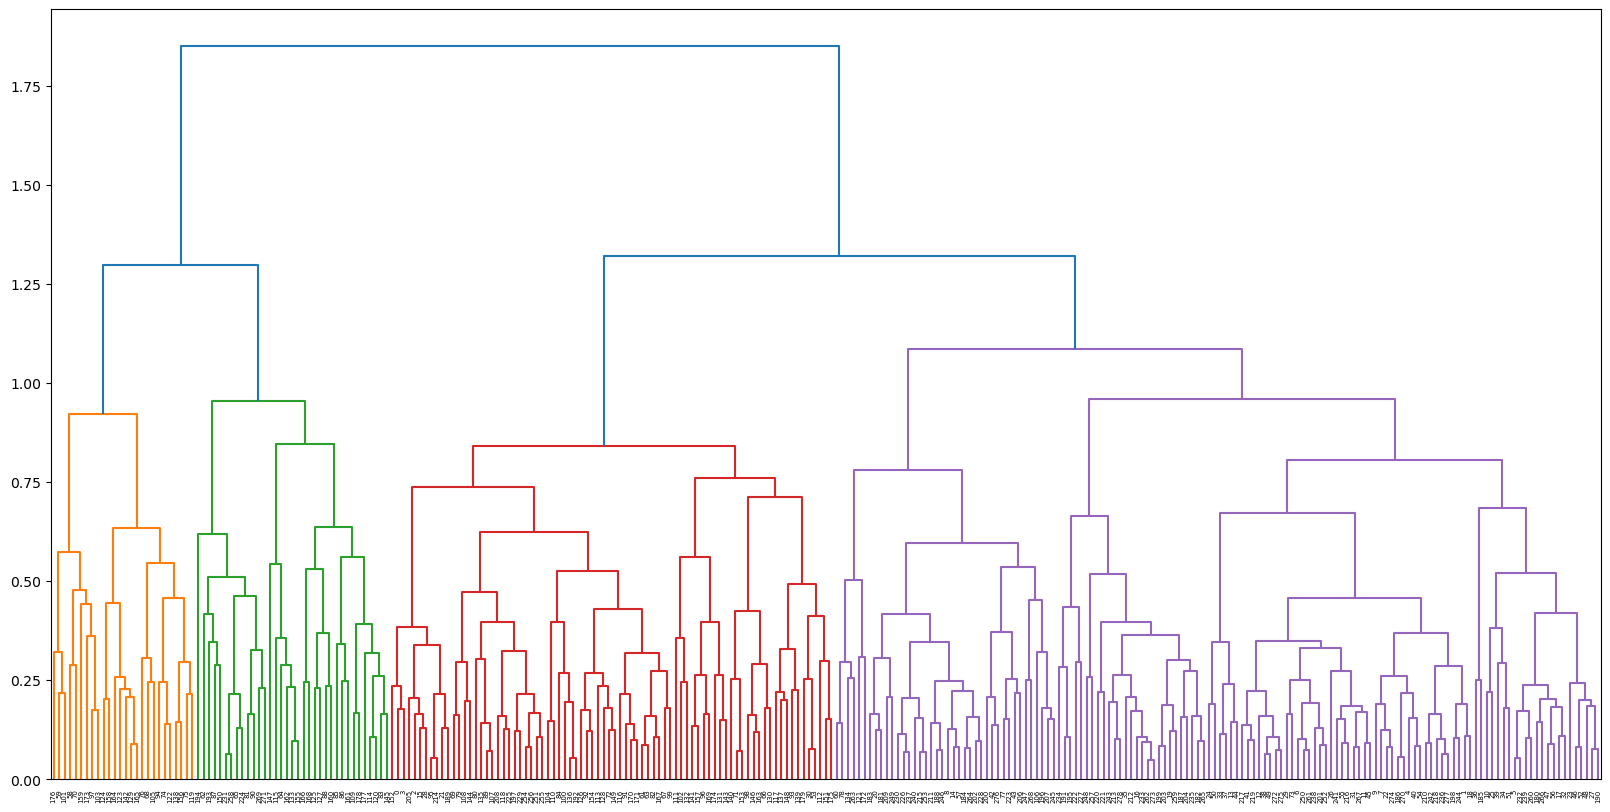

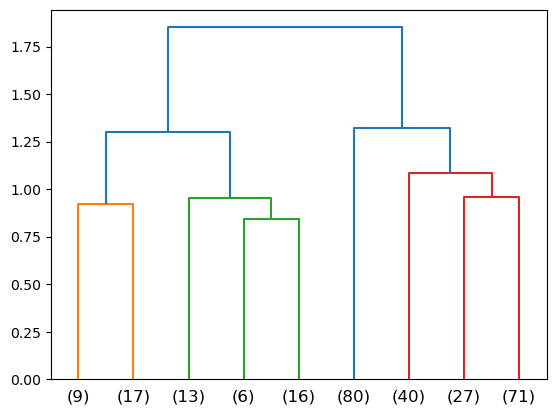

In [17]:
CompleteCluster = linkage(XData,"complete")
plt.figure(figsize=[20,10])
dendrogram(CompleteCluster)
plt.show()

plt.figure()
dendrogram(CompleteCluster,truncate_mode="lastp",p=9)
plt.show()

In [11]:
KCompleteCluster = fcluster(CompleteCluster,3,criterion="maxclust")
unique, counts = np.unique(KCompleteCluster, return_counts=True)
print("Complete-hierarchical cluster ",dict(zip(unique, counts)))

Complete-hierarchical cluster  {1: 61, 2: 80, 3: 138}


## Subset

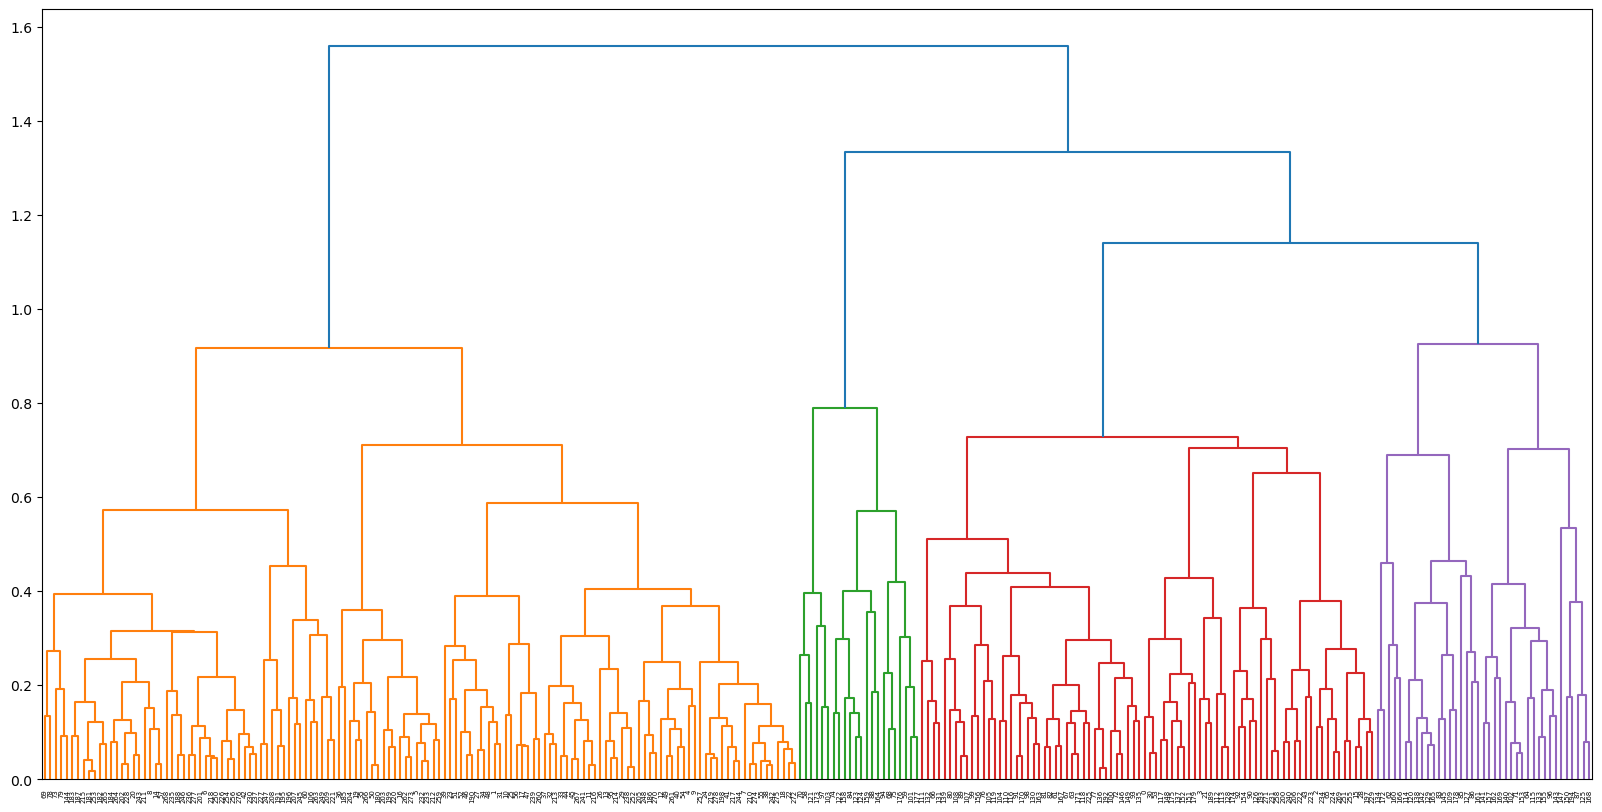

Complete-hierarchical cluster  {1: 136, 2: 22, 3: 121}


In [25]:
CompleteCluster = linkage(XData[:,2:],"complete")
plt.figure(figsize=[20,10])
dendrogram(CompleteCluster)
plt.show()

KCompleteCluster = fcluster(CompleteCluster,3,criterion="maxclust")
unique, counts = np.unique(KCompleteCluster, return_counts=True)
print("Complete-hierarchical cluster ",dict(zip(unique, counts)))

# Average

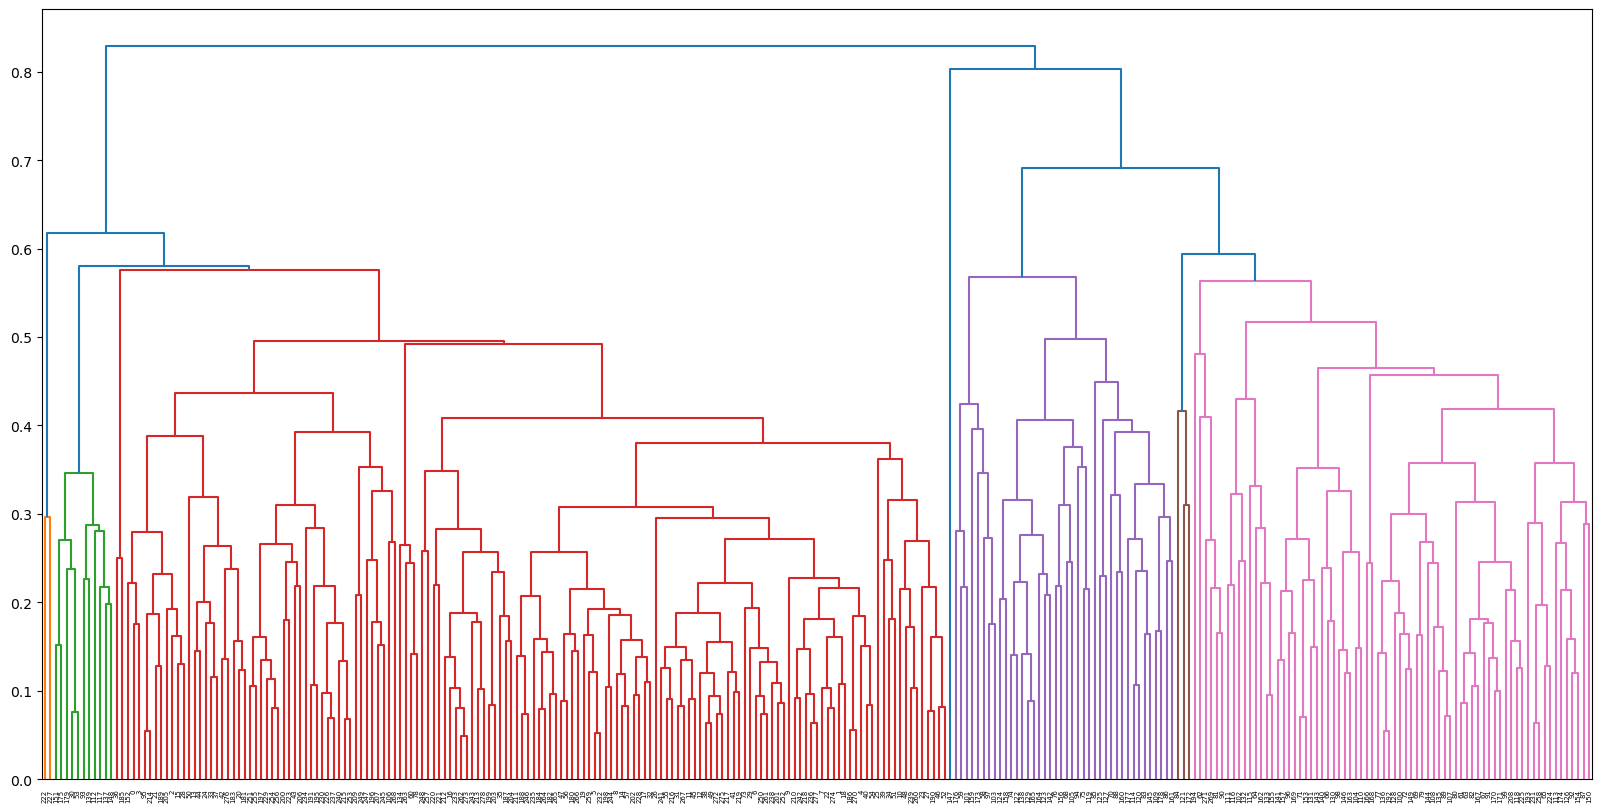

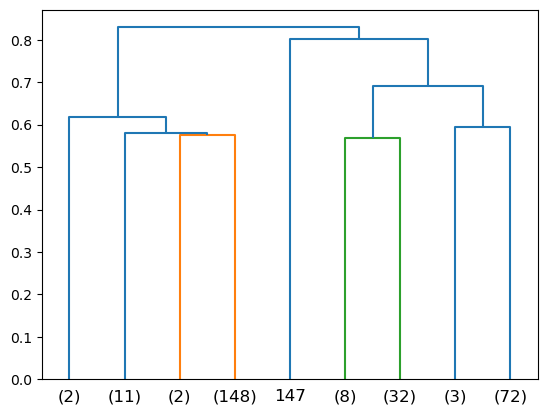

In [18]:
AverageCluster = linkage(XData,"average")
plt.figure(figsize=[20,10])
dendrogram(AverageCluster)
plt.show()

plt.figure()
dendrogram(AverageCluster,truncate_mode="lastp",p=9)
plt.show()

In [13]:
KAverageCluster = fcluster(AverageCluster,3,criterion="maxclust")
unique, counts = np.unique(KAverageCluster, return_counts=True)
print("Average-hierarchical cluster ",dict(zip(unique, counts)))


Average-hierarchical cluster  {1: 163, 2: 115, 3: 1}


## Subset

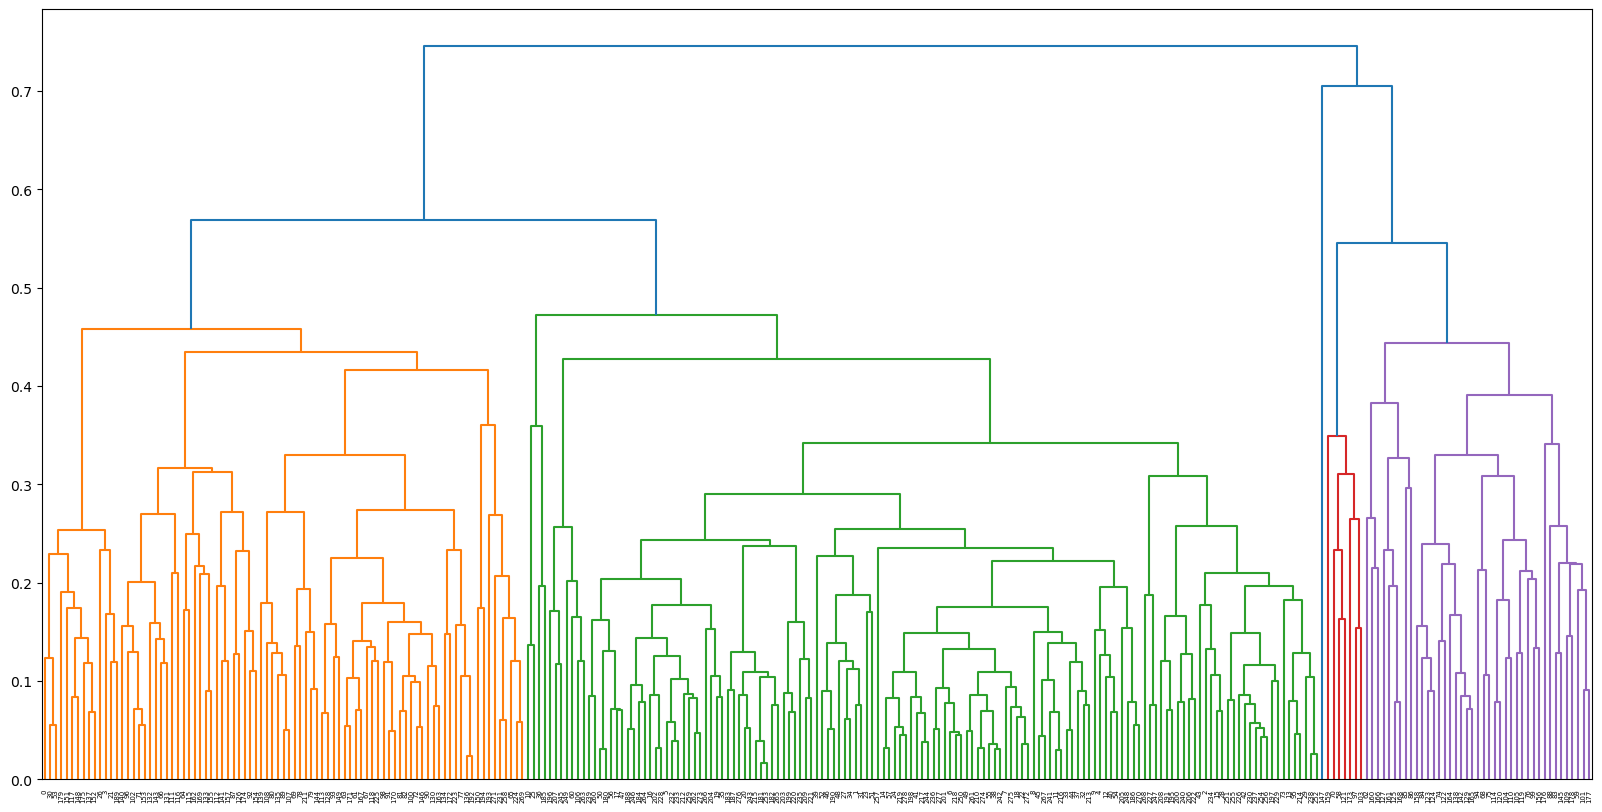

Average-hierarchical cluster  {1: 230, 2: 48, 3: 1}


In [26]:
AverageCluster = linkage(XData[:,2:],"average")
plt.figure(figsize=[20,10])
dendrogram(AverageCluster)
plt.show()

KAverageCluster = fcluster(AverageCluster,3,criterion="maxclust")
unique, counts = np.unique(KAverageCluster, return_counts=True)
print("Average-hierarchical cluster ",dict(zip(unique, counts)))

# K-means

In [20]:
Km= KMeans(n_clusters=3)
Km.fit(XData)
print(Km.labels_)
unique, counts = np.unique(Km.labels_, return_counts=True)
print("k-means cluster ",dict(zip(unique, counts)))

[1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 1 1 1 1 1 1 1 2 0 2 1 1 0
 2 2 2 1 0 0 1 1 1 2 1 2 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 1 2 0 1 1 2 1
 1 1 1 2 2 1 1 1 1 2 2 2 2 2 2 1 2 1 2 1 1 1 1 0 1 1 0 2 1 1 1 2 1 0 2 1 2
 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 2 2 1 1 1 1 1 1 1 2 1 1 2 2 2 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
Average-hierarchical cluster  {0: 139, 1: 98, 2: 42}
